In [1]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


sample numbers，  ， 
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


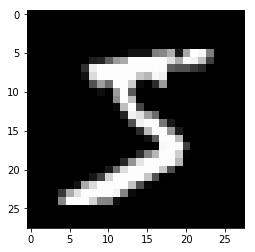

5

In [5]:

print('sample numbers，  ， ')
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
im = plt.imshow(x_train[0], cmap='gray')
plt.show()
y_train[0]

In [7]:
# x标签处理
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train / 255
x_test = x_test / 255

In [8]:
# y标签处理
# 5 -> [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [9]:
# 构建模型
model = Sequential()
# 第一个隐藏层
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
# 第二个隐藏层
model.add(Dense(256, activation='relu'))
#  输出层
model.add(Dense(10, activation='softmax'))
model.summary()

W0128 15:21:27.803348  3932 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0128 15:21:30.163062  3932 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0128 15:21:31.037802  3932 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 模型编译
model.compile(optimizer=SGD(), loss='categorical_crossentropy',metrics=['accuracy'])

W0128 15:21:51.538587  3932 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0128 15:21:51.653259  3932 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:

# 模型训练
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

W0128 15:22:00.743968  3932 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0128 15:22:00.886167  3932 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 242us/step - loss: 2.2993 - acc: 0.1136 - val_loss: 2.2983 - val_acc: 0.1135
Epoch 2/5
60000/60000 [==============================] - 10s 168us/step - loss: 2.2984 - acc: 0.1124 - val_loss: 2.2979 - val_acc: 0.1135
Epoch 3/5
60000/60000 [==============================] - 10s 161us/step - loss: 2.2981 - acc: 0.1124 - val_loss: 2.2977 - val_acc: 0.1135
Epoch 4/5
60000/60000 [==============================] - 11s 175us/step - loss: 2.2978 - acc: 0.1124 - val_loss: 2.2973 - val_acc: 0.1135
Epoch 5/5
60000/60000 [==============================] - 12s 200us/step - loss: 2.2975 - acc: 0.1124 - val_loss: 2.2969 - val_acc: 0.1135


In [12]:

# 训练结构评估
score = model.evaluate(x_test, y_test)
print('LOSS', score[0])
print('ACCU', score[1])

10000/10000 [==============================] - 1s 78us/step
LOSS 2.296921897506714
ACCU 0.1135
